1309


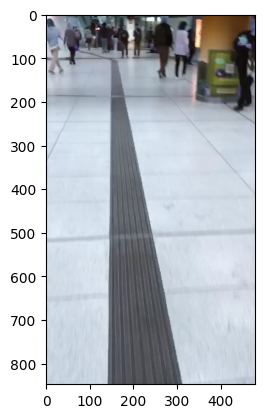

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from Function import *

#klappt für:
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\muc_bhf_4.mp4"
#"C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\muc_bhf_5.mp4"

#klappt nicht mit:


video_path = "C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\muc_bhf_3.mp4"
frames = read_video_frames(video_path)
print(len(frames))

frames1 = frames[1000:1309]

img = frames1[140][1]
plt.imshow(img)

848


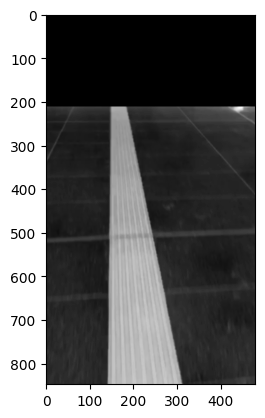

In [4]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.gray()

#plt.imshow(gray_image)

img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)

Farbe = "B"   #Farbe der Orientierungslinie wählen: w für weiß und s für schwarz

img_b_or_w = white_or_black(img_blur, Farbe)

#Oberes vietrl des Bildes schwärzen
h = img_b_or_w.shape[0]
print(h)
region = 1/4
top_region = img_b_or_w[0:int(h*region), :]  # Obere 1/4 des Bildes auswählen

# Schwärze den ausgewählten Bereich
top_region = np.zeros_like(top_region)

# Füge den geschwärzten Bereich wieder in das ursprüngliche Bild ein
img_b_or_w[0:int(h*region), :] = top_region

plt.imshow(img_b_or_w)

[28, 28, 28, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 32, 34, 39, 45, 48, 46, 42, 39, 37, 37, 36, 37, 37, 37, 37, 37, 37, 36, 36, 36, 37, 37, 37, 36, 36, 36, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 31, 35, 42, 56, 76, 99, 120, 133, 141, 143, 143, 142, 141, 141, 141, 141, 141, 142, 144, 145, 146, 146, 145, 145, 145, 145, 145, 144, 144, 144, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 144, 139, 124, 98, 69, 48, 38, 35, 35, 35, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 35, 35, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 35, 36,

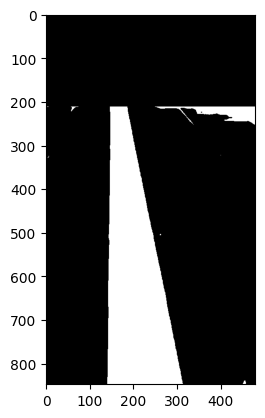

In [10]:
thresh_1, thresh_2 = find_thresh(img_b_or_w, 0.165)

print("1:", thresh_1)
print("2:", thresh_2)

t, seg = cv2.threshold(img_b_or_w,thresh_1,255,cv2.THRESH_BINARY)
plt.imshow(seg)
print(seg.dtype)

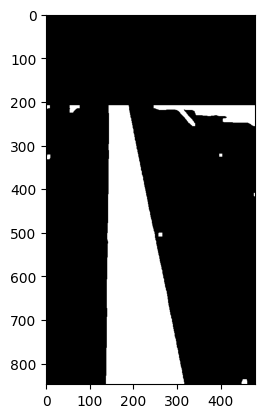

In [6]:
bw_new = cv2.dilate(seg.astype('uint8'), np.ones((3,3)), iterations=3)
plt.imshow(bw_new)

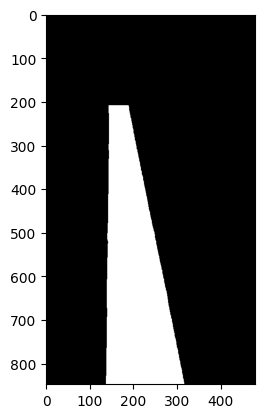

In [7]:
img_largest = find_largest_component(bw_new)
plt.imshow(img_largest)

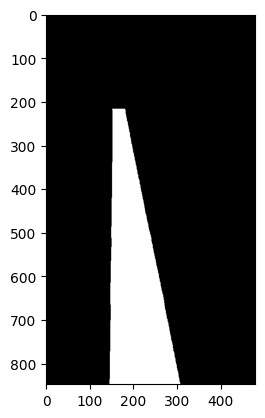

In [8]:
bw_new2 = cv2.erode(img_largest.astype('uint8'), np.ones((3,3)), iterations=8)
plt.imshow(bw_new2)

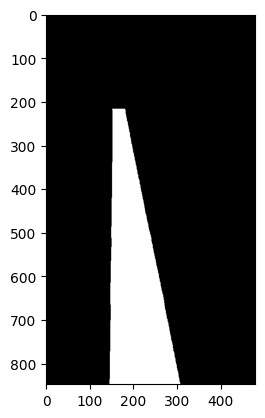

In [15]:
img_largest = find_largest_component(bw_new2)
plt.imshow(img_largest)

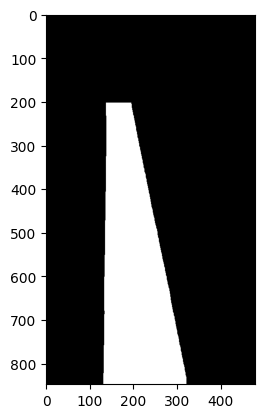

In [16]:
bw_new3 = cv2.dilate(img_largest.astype('uint8'), np.ones((3,3)), iterations=14)
plt.imshow(bw_new3)

848
[28, 28, 28, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 32, 34, 39, 45, 48, 46, 42, 39, 37, 37, 36, 37, 37, 37, 37, 37, 37, 36, 36, 36, 37, 37, 37, 36, 36, 36, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 31, 35, 42, 56, 76, 99, 120, 133, 141, 143, 143, 142, 141, 141, 141, 141, 141, 142, 144, 145, 146, 146, 145, 145, 145, 145, 145, 144, 144, 144, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 144, 139, 124, 98, 69, 48, 38, 35, 35, 35, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 35, 35, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 35,

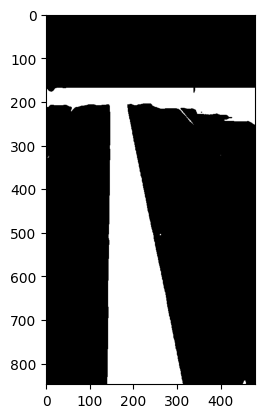

In [2]:
color = "B"
img_lines_seg = seg_orientation_lines(img, color, 0.165)

plt.imshow(img_lines_seg)

In [ ]:
#Notes:

#Bei schwarzen Orientierungslinien bei muc_bhf_3 thresh_1 besser als 2 und percentage eher bei 0.185...
#[300]: 0.22
#[380]: 0.159 gut, 17 okay
#[430]: 0.165 gut
#[499]: 0.18 gut drüber fehlerhaft
#[550]: 0.176 gut drüber falsch
#[600]-[630]: immer fehlerhaft
#[690]: 0.165: wieder besser, aber nicht top
#[730]: 0.165: top
